In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the images

In [2]:
img_array = cv2.imread(r'C:\Users\Tushar Kakade\Documents\AEL Python Programs\TermWork_2\train1\Closed_Eyes\s0001_00001_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)

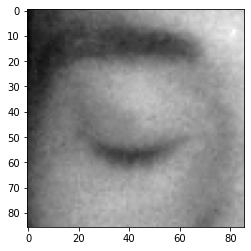

In [3]:
plt.imshow(img_array, cmap="gray")

In [4]:
img_array.shape

(86, 86)

In [5]:
import os

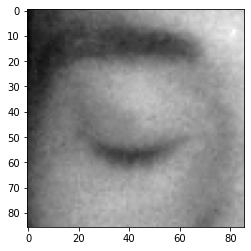

In [6]:
Datadirectory = r'C:\Users\Tushar Kakade\Documents\AEL Python Programs\TermWork_2\train1'
Classes = ['Closed_Eyes', 'Open_Eyes']
# Datadirectory = 'dataset_new/train/'
# Classes = ['Closed', 'Open']
for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

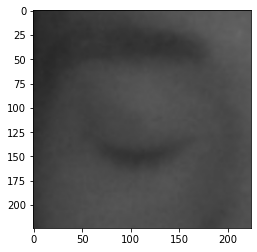

In [7]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [8]:
training_data = []

def create_training_data():
  for category in Classes:
      path = os.path.join(Datadirectory, category)
      class_num = Classes.index(category)
      for img in os.listdir(path):
        try :
           img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
           backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
           new_array = cv2.resize(backtorgb, (img_size,img_size))
           training_data.append([new_array, class_num])
        except Exception as e:
          pass
   

In [9]:
create_training_data()

In [10]:
print(len(training_data))

4000


In [11]:
import random
random.shuffle(training_data)

In [12]:
#here we reshape the image.
X = []
y = []
for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [13]:
X.shape

(4000, 224, 224, 3)

In [ ]:
X = X/255.0

In [16]:
Y = np.array(y)

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Using the pre-trained mobilenet model.

In [18]:
model = tf.keras.applications.mobilenet.MobileNet()

In [19]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [20]:
base_input = model.layers[0].input

In [21]:
base_output = model.layers[-4].output

In [22]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [23]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [24]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [25]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [26]:
history = new_model.fit(X,Y, epochs = 2, validation_split = 0.1)
#Note: Increase the number of epoch to get more appropriate result, accuracy.

Epoch 1/2
113/113 [==============================] - 506s 4s/step - loss: 0.0336 - accuracy: 0.9922 - val_loss: 0.3993 - val_accuracy: 0.8925
Epoch 2/2
113/113 [==============================] - 477s 4s/step - loss: 4.2390e-04 - accuracy: 0.9997 - val_loss: 0.0027 - val_accuracy: 0.9975


In [27]:
new_model.save('my_model.h5')

In [28]:
new_model = tf.keras.models.load_model('my_model.h5')

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

#Test whether the eye is closed or open

As the value ranges from 0 to 1, we the eye is detected as closed, then  the value will be nearer to zero. 
And if the eye is detected as open then it will be near to 1.

In [39]:
img_array = cv2.imread(r'C:\Users\Tushar Kakade\Documents\AEL Python Programs\TermWork_2\train1\Open_Eyes\s0001_02340_0_0_1_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [40]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [41]:
X_input.shape

(1, 224, 224, 3)

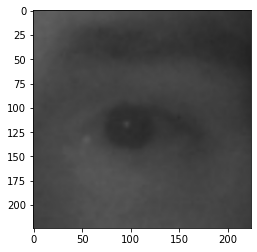

In [42]:
plt.imshow(new_array)

In [43]:
X_input = X_input/255.0

In [44]:
prediction = new_model.predict(X_input)

In [45]:
prediction

array([[1.]], dtype=float32)